### Joining on IMBD basics with TN budgets



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

In [4]:
ls

Dani/                         movies_gross_clean.csv
DataClean_Nick.ipynb          peoplefigs/
Data_cleaning_marvel.ipynb    profitability_join.ipynb
Nick_movieppl_analysis.ipynb  raw_data_hist.png
README.md                     theNumbers_clean.csv
cleanIMDB/                    twitter_reviews_clean.csv
imdb_combined_prof.csv        zippedData/


In [5]:
ls ./zippedData/

bom.movie_gross.csv.gz        imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz       rt.movie_info.tsv.gz
imdb.title.akas.csv.gz        rt.reviews.tsv.gz
imdb.title.basics.csv.gz      tmdb.movies.csv.gz
imdb.title.crew.csv.gz        tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [6]:
tn_df = pd.read_csv('theNumbers_clean.csv')
imdb_basics = pd.read_csv('./cleanIMDB/imdb_comp.csv')
twitter_reviews = pd.read_csv('twitter_reviews_clean.csv')
movies_gross = pd.read_csv('movies_gross_clean.csv')

In [7]:
# Check number of duplicates in each dataset

print(imdb_basics.duplicated(subset='primary_title').sum())
print(tn_df['movie'].duplicated().sum())

10073
18


In [8]:
imdb_basics.head(1)

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,...,archive_footage,archive_sound,cinematographer,composer,director_pr,editor,producer,production_designer,self,writer_pr
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"['Action', 'Crime', 'Drama']",7.0,77.0,['nm0712540'],...,NaN,NaN,NaN,['nm0006210'],['nm0712540'],NaN,NaN,NaN,NaN,"['nm0023551', 'nm1194313', 'nm0347899', 'nm139..."


In [9]:
tn_df.head(1)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI_percent,ROI_usd,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI_USD_inf
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,2351345279,2009,December,1.27,3.525959e+09,9.658447e+08,539750000.0,2.986209e+09


In [10]:
# Concatenate movie name and year together, creating a new column called 'concat'

tn_df['concat'] = tn_df['movie'] + tn_df['year'].apply(lambda x: str(x))
imdb_basics['concat'] = imdb_basics['primary_title'] + imdb_basics['start_year'].apply(lambda x: str(x))

In [11]:
# Join based on our new concatenated field

imdb_combined = imdb_basics.merge(tn_df, how='inner', on='concat')

## Calculate summary statistics for methodology slide

In [12]:
imdb_combined.to_csv('imdb_combined_prof.csv')

In [13]:
imdb_combined.dropna(subset=['genres','directors'], inplace=True)

In [14]:
imdb_combined.describe()

,Unnamed: 0_x,start_year,runtime_minutes,averagerating,numvotes,Unnamed: 0_y,id,production_budget,domestic_gross,worldwide_gross,ROI_percent,ROI_usd,year,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI_USD_inf
count,1415.00,1415.00,1405.00,1389.00,1389.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00,1415.00
mean,33392.74,2013.88,107.98,6.38,123299.57,2333.73,50.70,47745521.31,60446748.92,151552143.20,2.94,103806621.89,2013.88,1.16,175484028.19,70068694.40,55428974.65,120055053.54
std,32433.95,2.60,18.98,0.98,167345.70,1628.17,28.61,56949013.74,86379483.48,239141366.06,12.37,197880590.81,2.60,0.05,275059339.05,99384382.43,65919273.23,227228656.88
min,20.00,2010.00,4.00,1.60,5.00,1.00,1.00,25000.00,0.00,26.00,-1.00,-200237650.00,2010.00,1.07,29.90,0.00,28750.00,-214254285.50
25%,7249.50,2012.00,95.00,5.80,20932.00,890.50,26.00,10000000.00,6508732.00,13593473.00,-0.01,-38028.00,2012.00,1.14,15904363.41,7539791.32,11500000.00,-44823.24
50%,21197.00,2014.00,106.00,6.40,67914.00,2178.00,51.00,25000000.00,32172757.00,61492104.00,1.29,28707924.00,2014.00,1.15,70915858.65,37238400.70,30250000.00,33550726.75
75%,52821.50,2016.00,118.00,7.10,153434.00,3638.50,75.50,60000000.00,73042508.00,170831600.50,3.13,115715332.00,2016.00,1.19,201635076.66,85516356.74,69475000.00,134419411.69
max,145937.00,2019.00,180.00,8.80,1841066.00,5748.00,100.00,410600000.00,700059566.00,2048134200.00,415.56,1748134200.00,2019.00,1.25,2232466278.00,763064926.94,496826000.00,1905466278.00


In [133]:
pd.set_option('display.max_columns', None)

In [137]:
imdb_combined.sort_values(by='production_budget', ascending=False).head(1)

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,actor,actress,archive_footage,archive_sound,cinematographer,composer,director_pr,editor,producer,production_designer,self,writer_pr,concat,Unnamed: 0_y,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI_percent,ROI_usd,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI_USD_inf
292,6448,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.00,"['Action', 'Adventure', 'Fantasy']",6.60,447624.00,['nm0551128'],"['nm0254645', 'nm0744429', 'nm0064181', 'nm093...","['nm0000136', 'nm0574534', 'nm0001691']",['nm0004851'],NaN,NaN,NaN,NaN,['nm0551128'],NaN,NaN,NaN,NaN,"['nm0694627', 'nm0254645', 'nm0744429', 'nm006...",Pirates of the Caribbean: On Stranger Tides2011,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1.55,635063875,2011,May,1.21,1265253288.75,291687288.75,496826000.00,768427288.75


In [138]:
imdb_combined.sort_values(by='worldwide_gross', ascending=False).head(1)

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,actor,actress,archive_footage,archive_sound,cinematographer,composer,director_pr,editor,producer,production_designer,self,writer_pr,concat,Unnamed: 0_y,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI_percent,ROI_usd,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI_USD_inf
1232,72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.00,"['Action', 'Adventure', 'Sci-Fi']",8.50,670926.00,"['nm0751577', 'nm0751648']","['nm1321655', 'nm1321656', 'nm0498278', 'nm045...","['nm0000375', 'nm1165110', 'nm0749263', 'nm026...",NaN,NaN,NaN,NaN,NaN,"['nm0751577', 'nm0751648']",NaN,NaN,NaN,NaN,"['nm0456158', 'nm1321655', 'nm1321656', 'nm049...",Avengers: Infinity War2018,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,5.83,1748134200,2018,April,1.09,2232466278.00,739908875.38,327000000.00,1905466278.00


In [15]:
imdb_combined.sort_values(by='ROI_percent', ascending=False).head(1)

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,writers,actor,actress,archive_footage,archive_sound,cinematographer,composer,director_pr,editor,producer,production_designer,self,writer_pr,concat,Unnamed: 0_y,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI_percent,ROI_usd,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI_USD_inf
910,35625,tt2309260,The Gallows,The Gallows,2015,81.00,"['Horror', 'Mystery', 'Thriller']",4.20,17763.00,"['nm4000389', 'nm3951039']","['nm3951039', 'nm4000389']","['nm3790547', 'nm4090362']","['nm6018502', 'nm2258992']",NaN,NaN,NaN,NaN,"['nm4000389', 'nm3951039']",NaN,"['nm2146601', 'nm0089658', 'nm0143939', 'nm244...",NaN,NaN,NaN,The Gallows2015,5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,415.56,41556474,2015,July,1.15,47904945.10,26179071.50,115000.00,47789945.10


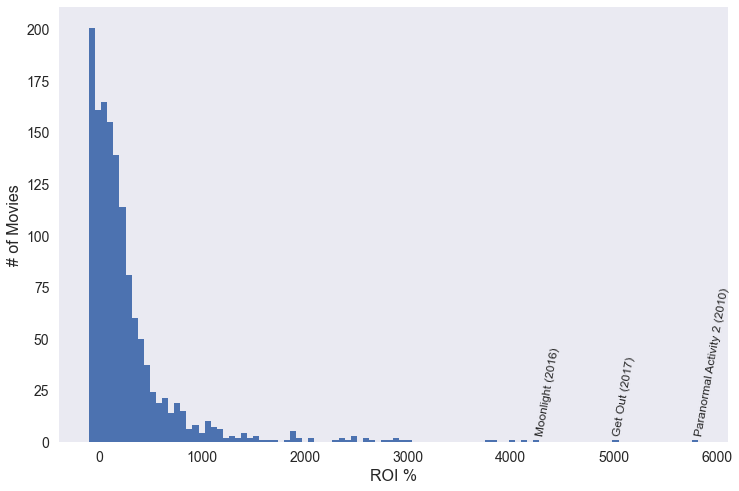

In [31]:
fig, ax = plt.subplots(figsize=[12,8])
plt.style.use('seaborn-talk')

ax.hist(imdb_sort['ROI%_inf'], bins=100)
ax.set_xlabel('ROI %', fontsize=16)
ax.set_ylabel('# of Movies', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate('Paranormal Activity 2 (2010)',(5960,3.3),rotation=80,ha='center', fontsize=12)
ax.annotate('Get Out (2017)',(5100,3.3),rotation=80,ha='center', fontsize=12)
ax.annotate('Moonlight (2016)',(4360,3.3),rotation=80,ha='center', fontsize=12)
ax.grid(False)
plt.savefig('raw_data_hist.png');

In [167]:
imdb_sort.to_csv('imdb_combined_prof.csv')